<a href="https://colab.research.google.com/github/kiruthik5000/AWS_Laboratory/blob/master/newExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsysm", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("drive/MyDrive/datas/magic04.data", names=cols)
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsysm,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


#Source
data collected from
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

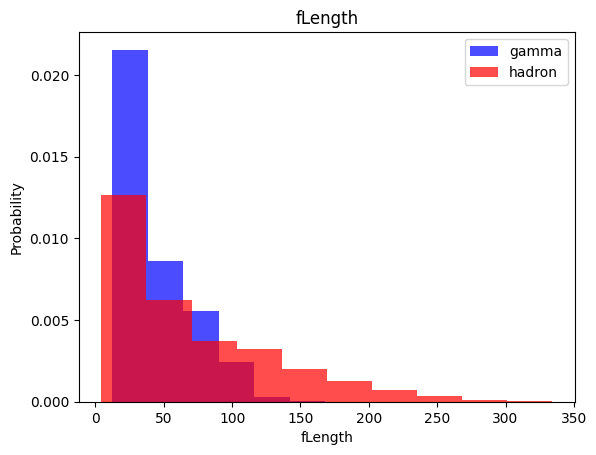

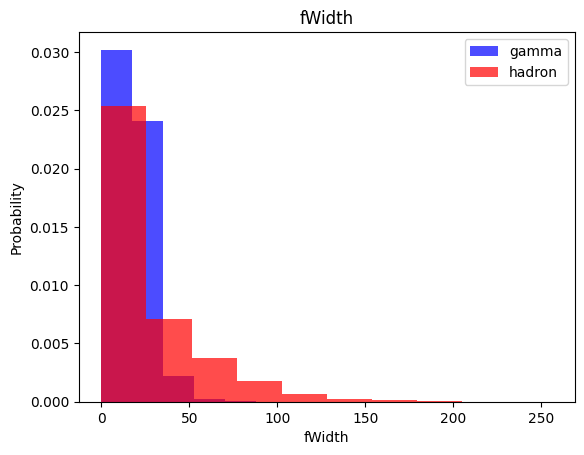

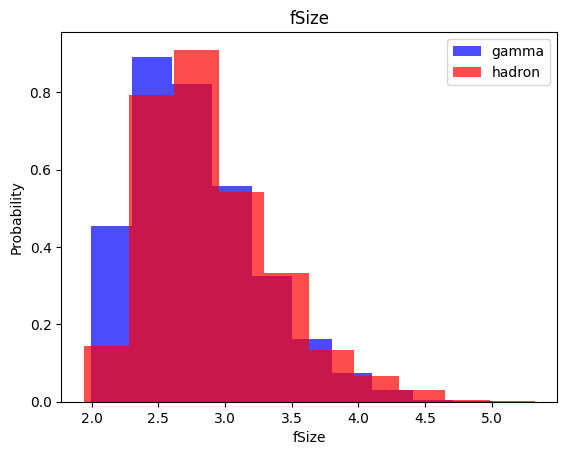

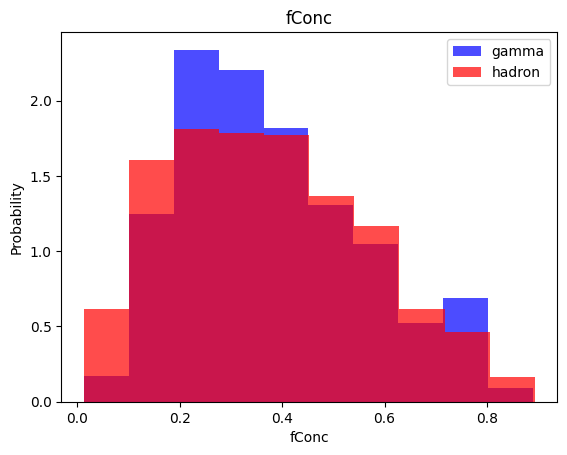

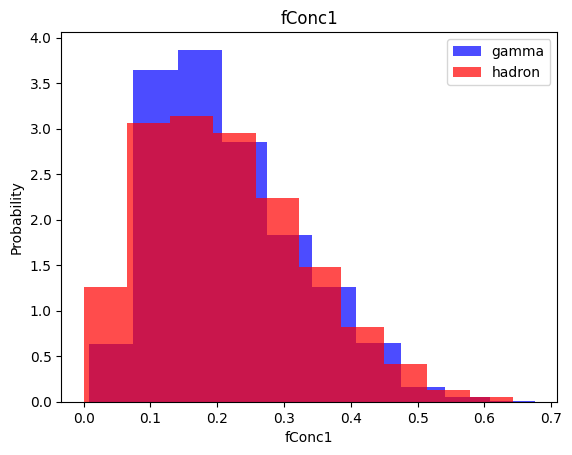

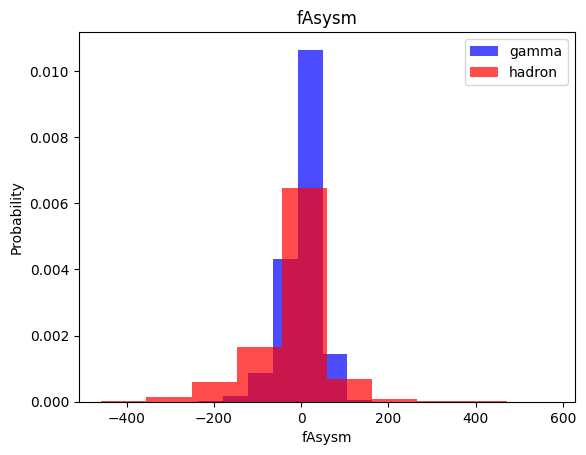

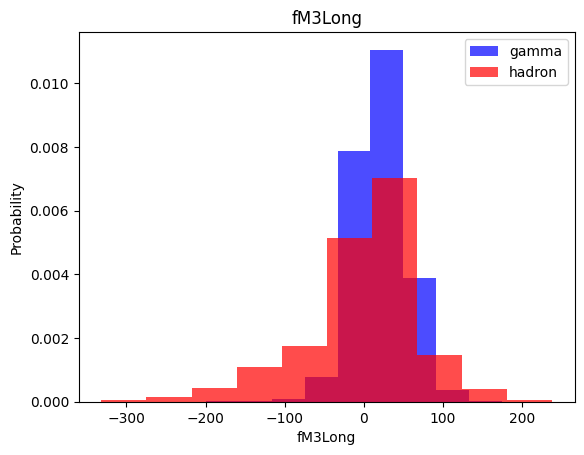

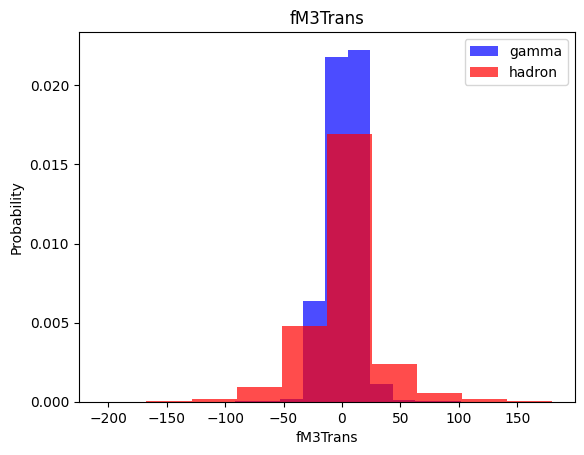

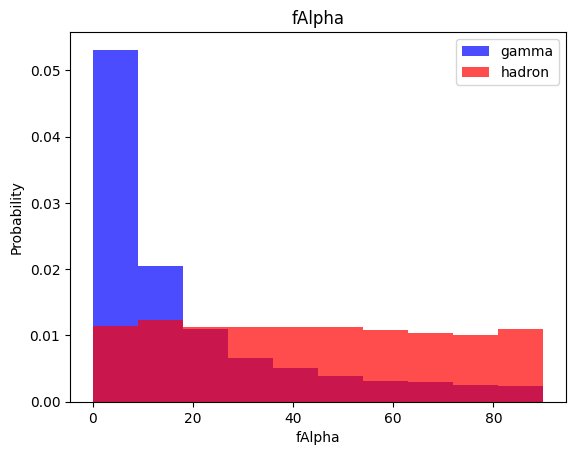

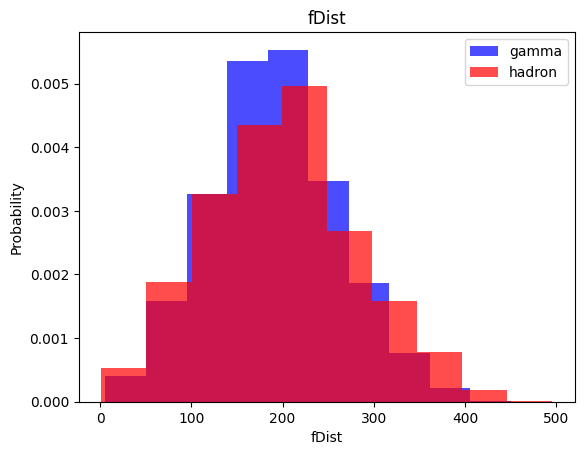

In [ ]:
for lable in cols[:-1]:
  plt.hist(df[df["class"] == 1][lable],color='blue', label='gamma',alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][lable],color='red', label='hadron',alpha=0.7, density=True)
  plt.title(lable)
  plt.ylabel("Probability")
  plt.xlabel(lable)
  plt.legend()
  plt.show()

# Spliting the Dataset


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, over_sampling=False):
    # Ensure input is a Pandas DataFrame
    if isinstance(dataframe, np.ndarray):
        dataframe = pd.DataFrame(dataframe)

    # Separate features (X) and target (y)
    X = dataframe.iloc[:, :-1]  # Select all columns except the last
    y = dataframe.iloc[:, -1]   # Select the last column as the target

    # Apply StandardScaler to the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply RandomOverSampler if requested
    if over_sampling:
        ros = RandomOverSampler()
        X_scaled, y = ros.fit_resample(X_scaled, y)

    # Combine the scaled features and target back into a single dataset
    data = np.hstack((X_scaled, np.reshape(y, (-1, 1))))  # Reshape y to match X's dimensions

    return data, X_scaled, y


In [ ]:
train, X_train, Y_train = scale_dataset(train, over_sampling=True)
valid, X_valid, Y_valid = scale_dataset(valid, over_sampling=False)
test, X_test, Y_test = scale_dataset(test, over_sampling=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#KNN model


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn_model.predict(X_test)
print(classification_report(Y_test, y_predict))
#

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1290
           1       0.87      0.85      0.86      2514

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayers


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [ ]:
y_predict = nb_model.predict(X_test)
print(classification_report(Y_test, y_predict))
#

              precision    recall  f1-score   support

           0       0.66      0.41      0.50      1299
           1       0.74      0.89      0.81      2505

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.73      0.71      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [ ]:
y_predict = lg_model.predict(X_test)
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1299
           1       0.85      0.82      0.84      2505

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM -> Support Vector Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
y_predict = svm_model.predict(X_test)
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1299
           1       0.89      0.90      0.90      2505

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



#Neural Network

In [ ]:
import tensorflow as tf

for ploting the model performance while fitting a data

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


fitting the model

In [ ]:
history = nn_model.fit(X_train, Y_train, epochs=100, validation_split=0.2, verbose=0)

plot the graph for model training level

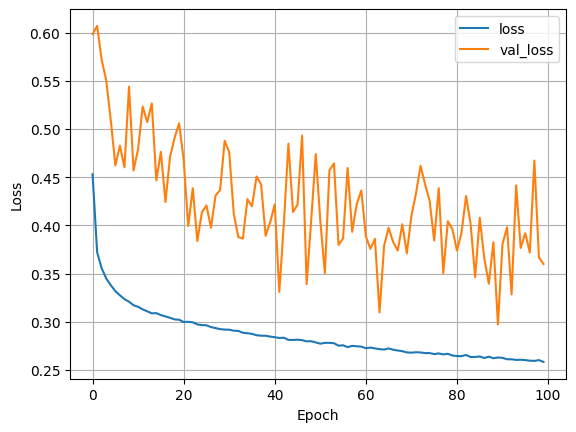

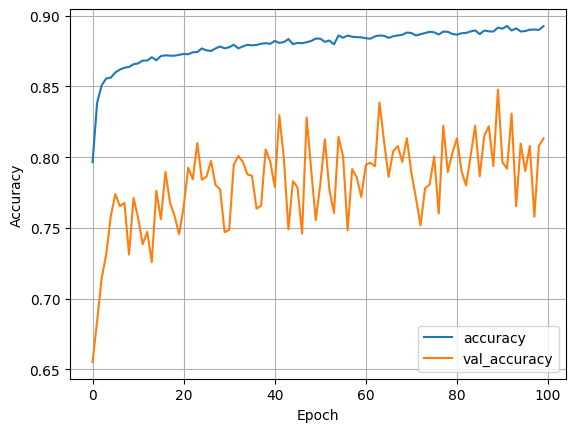

In [ ]:
plot_loss(history)
plot_accuracy(history)